In [1]:
from pathlib import Path
import pandas as pd

In [ ]:
# originals
data_path_e = Path('../../data/eclipse_clear.json')
data_path_m = Path('../../data/mozilla_mozall.json')

df_json_e = pd.read_json(data_path_e, lines=True)
df_json_m = pd.read_json(data_path_m, lines=True)

display(df_json_e.head(2))
display(df_json_m.head(2))

In [3]:
df_json_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361006 entries, 0 to 361005
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   _id           361006 non-null  object
 1   bug_id        361006 non-null  int64 
 2   product       361006 non-null  object
 3   description   361006 non-null  object
 4   bug_severity  361006 non-null  object
 5   dup_id        361006 non-null  object
 6   short_desc    361006 non-null  object
 7   priority      361006 non-null  object
 8   version       361006 non-null  object
 9   component     361006 non-null  object
 10  delta_ts      361006 non-null  object
 11  bug_status    361006 non-null  object
 12  creation_ts   361006 non-null  object
 13  resolution    361006 non-null  object
dtypes: int64(1), object(13)
memory usage: 38.6+ MB


In [5]:
df_json_e.bug_severity.value_counts()

bug_severity
normal         242819
enhancement     45499
major           35367
minor           13438
critical        12845
blocker          6223
trivial          4815
Name: count, dtype: int64

In [4]:
df_json_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768335 entries, 0 to 768334
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   _id           768335 non-null  object
 1   bug_id        768335 non-null  int64 
 2   product       768335 non-null  object
 3   description   768326 non-null  object
 4   bug_severity  768335 non-null  object
 5   dup_id        768335 non-null  object
 6   short_desc    768335 non-null  object
 7   priority      768335 non-null  object
 8   version       768335 non-null  object
 9   component     768335 non-null  object
 10  delta_ts      768335 non-null  object
 11  bug_status    768335 non-null  object
 12  creation_ts   768335 non-null  object
 13  resolution    768335 non-null  object
dtypes: int64(1), object(13)
memory usage: 82.1+ MB


In [6]:
df_json_m.bug_severity.value_counts()

bug_severity
normal         523540
major           71084
critical        65478
enhancement     43689
minor           36617
trivial         16134
blocker         11793
Name: count, dtype: int64

In [13]:
print(df_json_e.creation_ts.min())
print(df_json_e.creation_ts.max())

2001-10-10 21:34:00 -0400
2013-12-31 22:40:00 -0500


In [12]:
print(df_json_m.creation_ts.min())
print(df_json_m.creation_ts.max())

1994-09-09 07:00:00 -0700
2013-12-31 22:10:17 -0800


In [17]:
df_json_e['bug_status'].value_counts()

bug_status
RESOLVED    218989
CLOSED       98510
VERIFIED     43507
Name: count, dtype: int64

In [18]:
df_json_m['bug_status'].value_counts()

bug_status
RESOLVED    555767
VERIFIED    211062
CLOSED        1506
Name: count, dtype: int64

In [19]:
df_json_m['resolution'].value_counts()

resolution
FIXED         341657
DUPLICATE     176725
WORKSFORME    100836
INVALID        69538
WONTFIX        36931
INCOMPLETE     31077
EXPIRED        10704
NDUPLICATE       760
MOVED            107
Name: count, dtype: int64

In [21]:
df_json_e['product'].unique()

array(['Platform', 'PDE', 'JDT', 'Equinox', 'Community', 'CDT', 'GEF',
       'z_Archived', 'AJDT', 'EMF', 'MDT.XSD', 'AspectJ',
       'TPTP Profiling', 'TPTP Agent Controller', 'WTP Java EE Tools',
       'TPTP Log Analyzer', 'TPTP Testing', 'MDT.UML2', 'WTP Webservices',
       'TPTP Release Engineering', 'Mylyn', 'TPTP Probe Instrumentation',
       'TPTP Common Logging', 'WTP Website', 'WTP Source Editing',
       'Web Tools', 'PTP', 'TPTP Static Analysis', 'WTP ServerTools',
       'WTP Common Tools', 'Linux Tools', 'WTP Releng', 'WTP EJB Tools',
       'ECF', 'ERCP', 'GMF-Tooling', 'WTP Incubator', 'BIRT',
       'TPTP Resource Monitoring', 'Data Tools', 'GMT', 'MDT',
       'TPTP Build to Manage', 'VTP', 'Target Management', 'M2T', 'GMP',
       'Higgins', 'Buckminster', 'MDT.OCL', 'Java Server Faces', 'BPEL',
       'Dali JPA Tools', 'EMFT', 'EPF', 'TPTP Line Coverage', 'Orbit',
       'MTJ', 'Dash', 'PDT', 'ATF', 'Modeling', 'Nebula', 'Mylyn Tasks',
       'JSDT', 'RAP', 'EMF

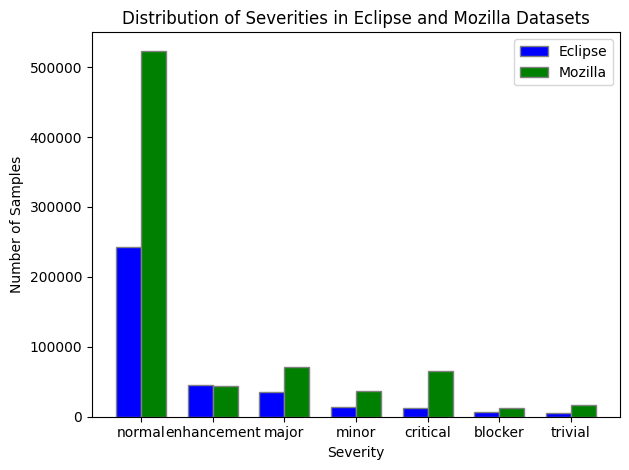

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data for Eclipse dataset
eclipse_severities = {
    'normal': 242819,
    'enhancement': 45499,
    'major': 35367,
    'minor': 13438,
    'critical': 12845,
    'blocker': 6223,
    'trivial': 4815
}

# Data for Mozilla dataset
mozilla_severities = {
    'normal': 523540,
    'major': 71084,
    'critical': 65478,
    'enhancement': 43689,
    'minor': 36617,
    'trivial': 16134,
    'blocker': 11793
}

# Severities and their corresponding counts
severities = list(eclipse_severities.keys())
eclipse_counts = list(eclipse_severities.values())
mozilla_counts = [mozilla_severities[severity] for severity in severities]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(severities))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, eclipse_counts, color='b', width=bar_width, edgecolor='grey', label='Eclipse')
plt.bar(r2, mozilla_counts, color='g', width=bar_width, edgecolor='grey', label='Mozilla')

# Add labels, title, and legend
plt.xlabel('Severity')
plt.ylabel('Number of Samples')
plt.title('Distribution of Severities in Eclipse and Mozilla Datasets')
plt.xticks([r + bar_width / 2 for r in range(len(severities))], severities)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

C:\Users\dessa\AppData\Local\Temp\ipykernel_7736\2525799911.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'0' if tick == 0 else f'${tick:.0f}x10^5$' for tick in yticks])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


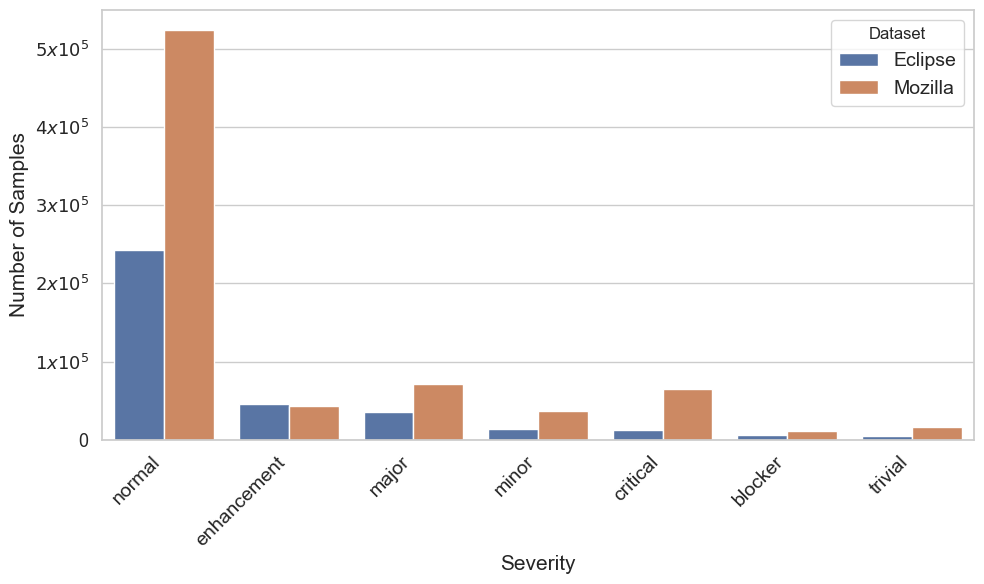

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Data for Eclipse dataset
eclipse_severities = {
    'Severity': ['normal', 'enhancement', 'major', 'minor', 'critical', 'blocker', 'trivial'],
    'Count': [242819, 45499, 35367, 13438, 12845, 6223, 4815],
    'Dataset': 'Eclipse'
}

# Data for Mozilla dataset
mozilla_severities = {
    'Severity': ['normal', 'major', 'critical', 'enhancement', 'minor', 'trivial', 'blocker'],
    'Count': [523540, 71084, 65478, 43689, 36617, 16134, 11793],
    'Dataset': 'Mozilla'
}

# Convert dictionaries to DataFrames
eclipse_df = pd.DataFrame(eclipse_severities)
mozilla_df = pd.DataFrame(mozilla_severities)

# Concatenate DataFrames
combined_df = pd.concat([eclipse_df, mozilla_df])

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=combined_df, x='Severity', y='Count', hue='Dataset')
# sns.barplot(data=combined_df, x='Severity', y='Count', hue='Dataset')

# Add labels, title, and legend
plt.xlabel('Severity', fontsize=15)
plt.ylabel('Number of Samples', fontsize=15)
# plt.title('Distribution of Severities in Eclipse and Mozilla Datasets')
plt.legend(title='Dataset', fontsize=14)

# Show plot
plt.yticks(fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Add suffix "x10^5" to each tick label on the y-axis
yticks = [tick / 1e5 for tick in ax.get_yticks()]
ax.set_yticklabels([f'0' if tick == 0 else f'${tick:.0f}x10^5$' for tick in yticks])

plt.tight_layout()
plt.savefig('severity_distribution.eps')
plt.show()

In [41]:
not False

True